## Pymaceutical Observations 
by Eugene Alejo:

1) The treatment process with Capomulin demonstrated a decline in tumor size with -19%. Whereas in other drugs such as Infubinol, Ketapril and Placebo the tumor size increased. 

2) The treatment process with Capomulin had a much slower spread on metastatic response to treatment.

3) Lastly, the treatment process with Capomulin prove slower decrease in terms of survival rates.


In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Data/mouse_drug_data.csv"
clinical_trial_data_to_load = "Data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_complete = pd.merge(clinical_data,
                                 mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vols_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

tumor_vols_mean = tumor_vols_mean.reset_index()

# Preview DataFrame
tumor_vols_mean.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()[("Tumor Volume (mm3)")]
# Convert to DataFrame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)
tumor_vols_sem
# Preview DataFrame
tumor_vols_sem.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_vols_pivot_mean.head()

index                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                 0       10        20       30       40      50       60   
5                 1       11        21       31       41      51       61   
10                2       12        22       32       42      52       62   
15                3       13        23       33       43      53       63   
20                4       14        24       34       44      54       64   

                                      Tumor Volume (mm3)             \
Drug      Ramicane Stelasyn Zoniferol          Capomulin   Ceftamin   
Timepoint                                                             
0               70       80        90          45.000000  45.000000   
5               71       81        91          44.266086  46.503051   
10              72       82        92          43.084291  48.285125   
15              73       83        93          42.064317  50.094055   
20              74       84        94          40.716325  52.157049   

                                                                             \
Drug       Infubinol   Ketapril   Naftisol    Placebo   Propriva   Ramicane   
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          47.062001  47.389175  46.796098  47.125589  47.248967  43.944859   
10         49.403909  49.582269  48.694210  49.423329  49.101541  42.531957   
15         51.296397  52.399974  50.933018  51.359742  51.067318  41.495061   
20         53.197691  54.920935  53.644087  54.364417  53.346737  40.238325   

                                 
Drug        Stelasyn  Zoniferol  
Timepoint                        
0          45.000000  45.000000  
5          47.527452  46.851818  
10         49.463844  48.689881  
15         51.529409  50.779059  
20         54.067395  53.170334

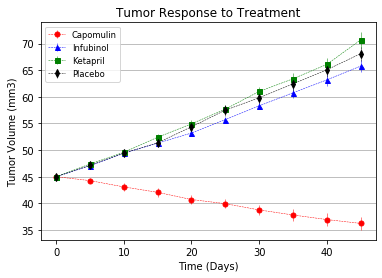

In [6]:
# Generate the Plot (with Error Bars)

plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Tumor Volume (mm3)']['Capomulin'], 
             yerr=tumor_vols_pivot_sem["Capomulin"], color="r", marker="o", 
             markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Tumor Volume (mm3)']['Infubinol'], yerr=tumor_vols_pivot_sem["Infubinol"],
            color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Tumor Volume (mm3)']['Ketapril'], yerr=tumor_vols_pivot_sem["Ketapril"],
            color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean['Tumor Volume (mm3)']['Placebo'], yerr=tumor_vols_pivot_sem["Placebo"],
            color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

# Save the Figure
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small", fancybox=True)

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
met_sites_mean = pd.DataFrame(met_sites_mean)
# Preview DataFrame
met_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_sites_sem = pd.DataFrame(met_sites_sem)

# Preview DataFrame
met_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index ="Timepoint", columns="Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_sites_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


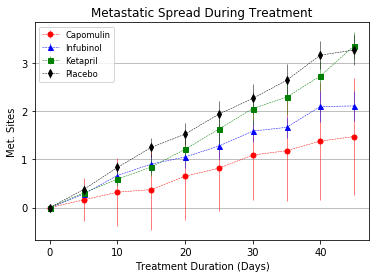

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"],
            yerr=tumor_vols_pivot_sem["Capomulin"], color="r", marker="o",
            markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"],
            yerr=met_sites_pivot_sem["Infubinol"], color="b", marker="^",
            markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"],
            yerr=met_sites_pivot_sem["Ketapril"], color="g", marker="s",
            markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"],
            yerr=met_sites_pivot_sem["Placebo"], color="k", marker="d",
            markersize=5, linestyle="dashed", linewidth=0.50)

# Save the Figure
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Show the Figure
plt.show()


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = clinical_data_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


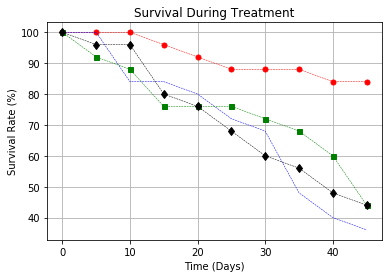

In [14]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * survival_count_pivot["Placebo"] / 25, "kd", linestyle="dashed", markersize=6, linewidth=0.50)

# Save the Figure
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
tumor_pct_change = 100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0]) / tumor_vols_pivot_mean.iloc[0]
tumor_pct_change_sem = 100 * (tumor_vols_pivot_sem.iloc[-1] - tumor_vols_pivot_sem.iloc[0]) / tumor_vols_pivot_sem.iloc[0]
# Display the data to confirm
tumor_pct_change

                    Drug     
index               Capomulin          inf
                    Ceftamin     90.000000
                    Infubinol    45.000000
                    Ketapril     30.000000
                    Naftisol     22.500000
                    Placebo      18.000000
                    Propriva     15.000000
                    Ramicane     12.857143
                    Stelasyn     11.250000
                    Zoniferol    10.000000
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

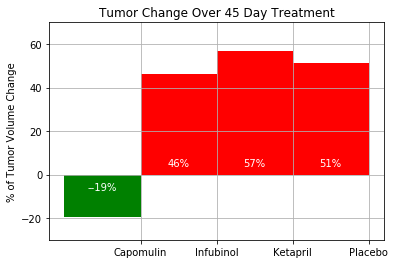

In [16]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Tumor Volume (mm3)"]["Capomulin"], 
            tumor_pct_change["Tumor Volume (mm3)"]["Infubinol"], 
            tumor_pct_change["Tumor Volume (mm3)"]["Ketapril"],
            tumor_pct_change["Tumor Volume (mm3)"]["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color="green")
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color="red")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% of Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3, '%d%%' % int(height),
               ha='center', va='bottom', color='white')

# Call functions to implement the function calls
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8, '-%d%%' % int(height),
               ha='center', va='bottom', color='white')

# Save the Figure
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Show the Figure
fig.show()